In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import pylab
%matplotlib inline 

In [2]:
cd D:/tud10239/Desktop/Python_scripts_telescope/


D:\tud10239\Desktop\Python_scripts_telescope


In [4]:
#from GaussianBeam import *

In [4]:
execfile(r'gaussianoptics_loop.py')

In [21]:
execfile(r'gaussianoptics_loop.py')

gaussianoptics.py:172: RuntimeWarning: divide by zero encountered in double_scalars
  NA = (gb4.w(np.size(zred),k) - gb4.w(z_0red[0]*0.01+np.size(zred),k))/(z_0red[0]*0.01)


In [199]:
import gaussianoptics
reload(gaussianoptics)

<module 'gaussianoptics' from 'gaussianoptics.py'>

In [328]:
lamda = 1064
lamdared = 633
d = 1.01  # diameter at 4 sigmas
dred = 2.12   # diameter at 4 sigmas
L = 420
DM = 280
f1 = 30
f2 = 50
l = 3.43
fred = 15.15
finfra = 15.44
index= 88
nr = 11
w0 = (0.160,-865)
z_w0 = 105+770
#gaussianoptics.testTelescope2( lamda, lamdared, d, dred, L, DM, f1, f2, l, fred, finfra, index, nr)

In [329]:
w0_red = dred/2
k = 1e6*2*np.pi/lamda
kred = 1e6*2*np.pi/lamdared
gb = GaussianBeam(w0, k)
gbred = GaussianBeam(w0_red, kred)
lens = ThinLens(f1, 10)
gb2 = lens*gb
lens2 = ThinLens(f2, f1+f2+l+10)
gb3 = lens2*gb2
lens3 = ThinLens(finfra, L)
lensred = ThinLens(fred,L)
gb4 = lens3*gb3
gbred2 = lensred*gbred
z = np.arange(0, 10)
z2 = np.arange(10, f1+f2+l+10)
z3 = np.arange(f1+f2+l+10, L)
z4 = np.arange(L, L*1.2,0.01)
zred = np.arange(0,L,)
zred2 = np.arange(L,L*1.2,0.01)

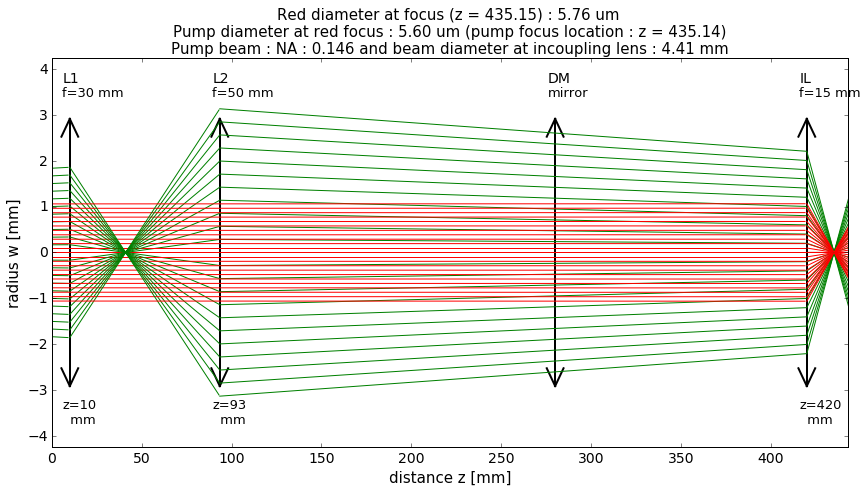

In [330]:
zl = np.array([10, f1+f2+l+10, DM, L])
ffinfrared = np.array([f1, f2, float("inf"), finfra])

fig = plt.figure(figsize = (12,7))
names = ["L1", "L2", "DM", "IL"]
for i in range(np.size(zl)): gaussianoptics.add_lens(zl[i], ffinfrared[i], w0_red*1.1, L, names[i], 0.4)#"L"+str(i))
    

for i in range(nr+1):
    factor = i*1.0/nr
    plt.plot(z, gb.w(z, k)*factor, 'g', z2, gb2.w(z2, k)*factor, 'g',  z3, gb3.w(z3, k)*factor, 'g',  z4, gb4.w(z4, k)*factor, 'g')
    plt.plot(z, -gb.w(z, k)*factor, 'g', z2, -gb2.w(z2, k)*factor, 'g',  z3, -gb3.w(z3, k)*factor, 'g',  z4, -gb4.w(z4, k)*factor, 'g')
    plt.plot(zred, gbred.w(zred, kred)*factor, 'r', zred2, gbred2.w(zred2, kred)*factor, 'r')
    plt.plot(zred, -gbred.w(zred, kred)*factor, 'r', zred2, -gbred2.w(zred2, kred)*factor, 'r')

w_0 = min(gb4.w(z4,k))
#z_0 gives the index of array ; z4 starts at L with step 0.01
z_0 = [i for i,x in enumerate(gb4.w(z4,k)) if x == w_0] 
#radius and location of the red beam at the focus of the incloupling lens
w_0red = min(gbred2.w(zred2,kred))
z_0red = [i for i,x in enumerate(gbred2.w(zred2,kred)) if x == w_0red] 



z_0rayleigh = [i for i,x in enumerate(gbred2.w(zred2,kred)) if abs(x - w_0red*2*np.sqrt(2))*1000 < 0.1]
#print "rayleigh range is", z_0rayleigh, z_0red

if (z_0[0]*0.01+np.size(zred) < z_0red[0]*0.01+np.size(zred)):
    NA = (gb4.w(np.size(zred),k) + gb4.w(z_0red[0]*0.01+np.size(zred),k))/(z_0red[0]*0.01)
else:
    NA = (gb4.w(np.size(zred),k) - gb4.w(z_0red[0]*0.01+np.size(zred),k))/(z_0red[0]*0.01)
if (z_0[0] == 0):
    NA = 1000
else:
    NA = gb4.w(np.size(zred),k)/(z_0[0]*0.01)


title = 'Red diameter at focus (z = {:.2f}) : {:.2f} um '.format(z_0red[0]*0.01+L, w_0red*2e3)
title = title +'\nPump diameter at red focus : {:.2f} um (pump focus location : z = {:.2f})'.format(gb4.w(z_0red[0]*0.01+L,k)*2e3,z_0[0]*0.01+L)
title = title + '\nPump beam : NA : {:.3f} and beam diameter at incoupling lens : {:.2f} mm'.format(NA,gb4.w(z4,k)[0]*2)
plt.title(title, fontsize = 15)
#plt.title("$w_0^{red}$ = " + str(np.trunc(w_0red*2000*1e3)/1e3) + " $\mu m \quad z_0^{red}$ = " + str(z_0red[0]*0.01+np.size(zred)) +"$\ z_0$ = " + str(z_0[0]*0.01+np.size(zred)) + "\nbeamsize($z_0^{red}$) = " + str(np.trunc(gb4.w(z_0red[0]*0.01+np.size(zred),k)*2000*1e3)/1e3) + "$\mu m$ NA = " + str(np.trunc(NA*1e3)/1e3), fontsize = 20 )#"z(waist red) = " + str(z_0[0]*0.01+np.size(zred)) +)
plt.xlabel('distance z [mm]', fontsize = 15)
plt.ylabel('radius w [mm]', fontsize = 15)
plt.axis([0, L+finfra*1.5, -w0_red*4, w0_red*4])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
title_fig = 'Telescope_Mephisto_w160um_f'+str(f1)+'_f'+str(f2)+'.png'
plt.savefig(title_fig)

#print 'Pump beam diameter at incoupling lens : {:.2f} mm'.format(gb4.w(z4,k)[0]*2)

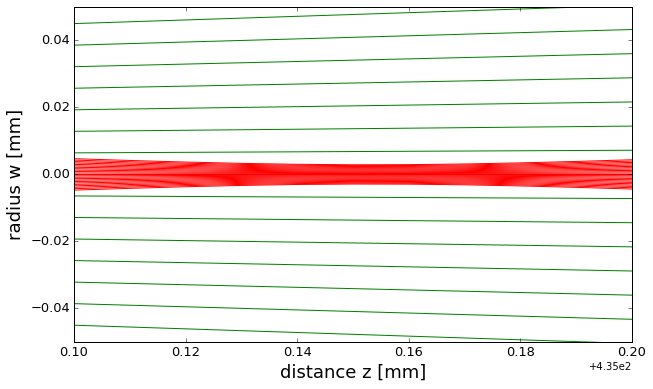

In [327]:
fig2 = plt.figure(figsize = (10,6))
#gaussianoptics.add_lens(z_0red[0]*0.01+L, float("inf"), gb4.w(z_0red[0]*0.01+L,k), L,  "", 1.0)

nr_zoom =11
for i in range(nr_zoom+1):
    factor = i*1.0/nr_zoom
    plt.plot(z4, gb4.w(z4, k)*factor, 'g')
    plt.plot(z4, -gb4.w(z4, k)*factor, 'g')
    plt.plot(zred, gbred.w(zred, kred)*factor, 'r', zred2, gbred2.w(zred2, kred)*factor, 'r')
    plt.plot(zred, -gbred.w(zred, kred)*factor, 'r', zred2, -gbred2.w(zred2, kred)*factor, 'r')
    
plt.xlabel('distance z [mm]', fontsize = 18)
plt.ylabel('radius w [mm]', fontsize = 18)
plt.axis([L+fred - 0.05, L+fred + 0.05, -0.05, 0.05])
plt.tick_params(axis='both', which='major', labelsize=13)
#plt.savefig('testTelescope_zoom' + str(index) + '.png')

In [203]:
#List of available plano-convex lenses at Thorlabs : 
f_avail = [25.4,30,35,40,50,60,75,100,125,150,175,200,250,300,400,500,750,1000]

Lenses : f1 = 40 mm and f2 = 50 mm.
Minimun diameter  : 6.16 um for extra distance l = 4.24 mm . 


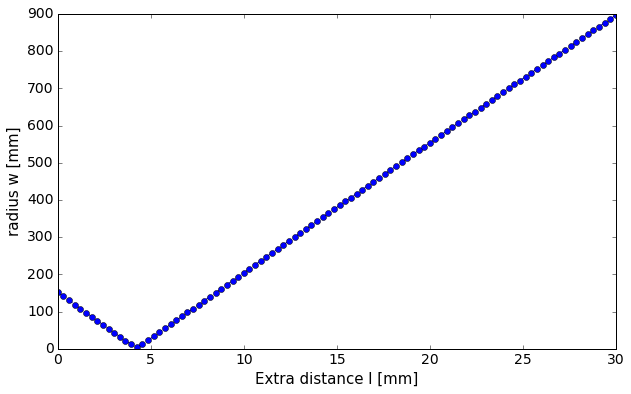

In [350]:
global_shift = 0
lamda = 1064
lamdared = 633
waist = 0.160
waist_loc = -865 - global_shift
dred = 2.12   # diameter at 4 sigmas
L = 420 + global_shift
DM = 280
f1 = 40
f2 = 50
l = np.linspace(00,30,100)
fred = 15.15
finfra = 15.44
index= 88
result_diameter = np.zeros(np.size(l))

for i in range(np.size(l)): 
    results = gaussianoptics.testTelescope4( lamda, lamdared, waist,waist_loc, dred, L, DM, f1, f2, l[i], fred, finfra, index)
    result_diameter[i] = results[0]*1e3
    #print 'Pump diameter : {:.2f} um for l =  {:.2f} mm'.format(result_diameter[i]*1e3, l[i])
    
fig3 = plt.figure(figsize = (10,6))
plt.plot(l, result_diameter, 'bo--')
print 'Lenses : f1 = {} mm and f2 = {} mm.'.format(f1,f2)
print 'Minimun diameter  : {:.2f} um for extra distance l = {:.2f} mm . '.format(min(result_diameter), l[np.argmin(result_diameter)])


plt.xlabel('Extra distance l [mm]', fontsize = 15)
plt.ylabel('radius w [mm]', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=14)

In [344]:
lamda = 1064
lamdared = 633
waist = 0.160*2
waist_loc = -865
dred = 2.12   # diameter at 4 sigmas
L = 420
DM = 280
f1 = f_avail#40
f2 = 100
l = np.linspace(0,40,30)
fred = 15.15
finfra = 15.44
index= 88
result_diameter = np.zeros(np.size(l), np.size(f1)))

for j in range(np.size(f1)):
    for i in range(np.size(l)): 
        results = gaussianoptics.testTelescope4( lamda, lamdared, waist,waist_loc, dred, L, DM, f1[j], f2, l[i], fred, finfra, index)
        result_diameter[i,j] = results[0]*1e3
        
    plt.figure(figsize = (10,6))
    plt.plot(l, result_diameter, 'bo--')
    print 'First lens : f = {:.1f}'.format(f1[j])
    print 'Minimun diameter : {:.2f} um for extra distance l = {:.2f} mm . '.format(min(result_diameter[:,j]), l[np.argmin(result_diameter)])

    plt.xlabel('Extra distance l [mm]', fontsize = 15)
    plt.ylabel('radius w [mm]', fontsize = 15)
    plt.tick_params(axis='both', which='major', labelsize=14)
    
plt.figure(figsize = (8,8))
im = plt.imshow(result_diameter, cmap = plt.cm.RdBu)

SyntaxError: invalid syntax (<ipython-input-344-6c3b81c1aea3>, line 14)

In [41]:
print 160e-6*np.sqrt(1+((105+770)/75.6e-6)**2)

1851.85185185


In [43]:
print 2.3e-3*(105+770)

2.0125


In [78]:
print 1064e-9/(np.pi*2.3e-3)*1e6

147.252921261


In [73]:
z=(105+770)*1e-3
w = 2.3e-3*z
print w

delta = w**4-4*(z*1064e-6/np.pi)**4
print delta
print np.sqrt(1./2*(w**2-np.sqrt(delta)))

0.0020125
1.63729153613e-11
4.3648155506e-05


In [66]:
print 0.031*np.sqrt(1+(z*1064e-6/(np.pi*0.031))**2)

0.0310014164394


In [74]:
print 1064e-6/(3.14*4.36e-5)

7.7718693391


In [320]:
print 5.72*2/3.

3.81333333333
